In [141]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np

In [143]:
url = "https://www.investing.com/commodities/gold-historical-data"
url1 = "https://www.investing.com/commodities/silver-historical-data"
req = urllib.request.Request(url, data=None, headers={'User-Agent': 'Chrome/35.0.1916.47'})

soup = BeautifulSoup(urllib.request.urlopen(req).read(),"lxml")

#extract data 
rows = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip(' ') for ele in cols]
    data.append([ele for ele in cols if ele])
 
#extract column names 
colnames = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[:1]
col_names = []
for col in colnames:
    cols = col.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    col_names.append(cols)
col_names = col_names[0]
    
#Write data to files
df1 = pd.DataFrame(data,columns = col_names)
df1.to_csv('gold_data.csv',mode = 'w', index=False)
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 27, 2018","1,335.00","1,333.60","1,338.30","1,333.40",-,0.08%
1,"Feb 26, 2018","1,333.90","1,328.70","1,342.80","1,328.70",-,0.38%
2,"Feb 25, 2018","1,328.80","1,330.30","1,331.60","1,328.40",-,-0.11%
3,"Feb 23, 2018","1,330.30","1,333.70","1,334.20","1,327.70",167.85K,-0.18%
4,"Feb 22, 2018","1,332.70","1,326.20","1,334.40","1,322.90",206.24K,0.05%
5,"Feb 21, 2018","1,332.10","1,331.20","1,338.50","1,324.40",255.62K,0.07%
6,"Feb 20, 2018","1,331.20","1,350.20","1,354.00","1,330.60",374.05K,-1.23%
7,"Feb 19, 2018","1,347.80","1,350.40","1,353.90","1,347.40",-,-0.20%
8,"Feb 18, 2018","1,350.50","1,349.70","1,352.40","1,349.70",-,-0.42%
9,"Feb 16, 2018","1,356.20","1,356.60","1,364.40","1,347.30",230.90K,0.07%


In [144]:
# 2018-02-19 2018-02-21 gold

input_string = input()
# input_string = '2018-02-19 2018-02-21 gold'
end_date,start_date,commodity = input_string.split(' ')


df1 = pd.read_csv('out1.csv',thousands=',')
df1.iloc[:,0]   = df1.iloc[:,0].apply(pd.to_datetime, errors='coerce')
df1.set_index('Date',inplace=True)
df1.iloc[:,1:4] = df1.iloc[:,1:4].apply(pd.to_numeric, errors='coerce')

Price_mean = df1[start_date:end_date].mean()[1]
Price_var = df1[start_date:end_date].var()[1]
print(Price_mean,Price_var)

1343.93333333 121.613333333


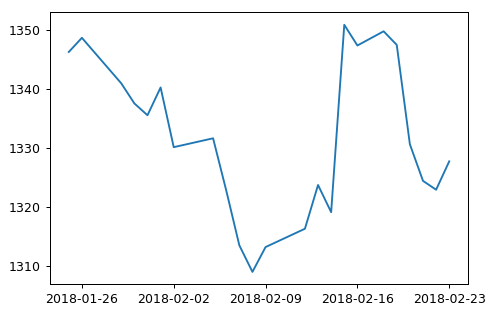

In [147]:
# import numpy as np
# import pandas as pd
# import chardet
import matplotlib.pyplot as plt
%matplotlib inline

df1.iloc[:,1:4] = df1.iloc[:,1:4].apply(pd.to_numeric, errors='coerce')
plt.rcParams['figure.dpi']= 90
plt.plot(df1['Low'])
